* In this Notebook we will classify 10 animal classes using a transfer learning model.
*It contains about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.
* All of them have equal number of image files. We will split them to train and test dataset and use them for training and testing.

* The name of the directories are also changed using the translate.py file

* I have used MobilenetV2 and got more than 94% accuracy in just 4 epochs.


* Author: Abhisek Saha

*   This dataset is downloaded from https://www.kaggle.com/alessiocorrado99/animals10cell-images-for-detecting-malaria




In [3]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Layer, Dense, Conv2D, GlobalMaxPool2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


In [6]:
!ls

animal10			 Maleria_cell_images.zip
archive.zip			 model.h5
bestanimal10predictor.hdf5	 my_model_weights.h5
cats_and_dogs_filtered		 __pycache__
cell_images			 raw-img
chest_xray			 raw-intel-images
chest_xray.zip			 tomato-leaf_disease
intelimage_mobilenet_weights.h5  tomato_leaf.zip
intel_images.zip		 translate.py
malaria_mobilenet_weights.h5


*This Part of the code is used to remove some of the directories start with 'raw-img*' which I have created accidentally.*

In [5]:
if os.path.isdir('raw-img'+'cat'):
    print('yes')

In [ ]:
from shutil import rmtree
import glob

for item in glob.glob("raw-img*"):
    if not os.path.isdir(item):
        continue
    rmtree(item)

In [ ]:
os.remove('translate.py')

In [ ]:
from shutil import rmtree
rmtree('raw-img')
rmtree('animal10')

# ----------------------------------------------------

In [ ]:
#!unzip archive.zip

In [ ]:
!ls

animal10     cats_and_dogs_filtered  raw-img
archive.zip  __pycache__	     translate.py


In [ ]:
from translate import translate
translate

{'butterfly': 'farfalla',
 'cane': 'dog',
 'cat': 'gatto',
 'cavallo': 'horse',
 'chicken': 'gallina',
 'cow': 'mucca',
 'dog': 'cane',
 'elefante': 'elephant',
 'elephant': 'elefante',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'scoiattolo': 'squirrel',
 'spider': 'ragno',
 'squirrel': 'scoiattolo'}

Its a python dictionary translating directory names to english language

In [ ]:
# Lets see what are the directories inside raw-img
for i in os.listdir('raw-img'):
  print(i)

dog
horse
elephant
butterfly
chicken
cat
cow
sheep
spider
squirrel


We need to translate the directory names using the translate dictionary

In [ ]:
translate['ragno'] = 'spider'
translate['scoiattolo'] = 'squirrel'
translate

{'butterfly': 'farfalla',
 'cane': 'dog',
 'cat': 'gatto',
 'cavallo': 'horse',
 'chicken': 'gallina',
 'cow': 'mucca',
 'dog': 'cane',
 'elefante': 'elephant',
 'elephant': 'elefante',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'ragno': 'spider',
 'scoiattolo': 'squirrel',
 'spider': 'ragno',
 'squirrel': 'scoiattolo'}

In [ ]:
for i in os.listdir('raw-img'):
  os.rename('raw-img/'+i,'raw-img/'+translate[i])

In [ ]:
!ls raw-img/

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


## Create Train test set

In [7]:
# Check the number of files in each directory
for dir in os.listdir('raw-img'):
  print(dir,len(os.listdir('raw-img/'+dir)) )

dog 4863
horse 2623
elephant 1446
butterfly 2112
chicken 3098
cat 1668
cow 1866
sheep 1820
spider 4821
squirrel 1862


Elephant has the least number of files which is 1446.
To maintain a balance dataset, We will create train data with 1000 images from each of these catagories and 400 images for each catagory as test set

In [8]:
# Check the number of files in each directory
for dir in os.listdir('raw-img'):
  print(dir,len(os.listdir('raw-img/'+dir)) )

dog 4863
horse 2623
elephant 1446
butterfly 2112
chicken 3098
cat 1668
cow 1866
sheep 1820
spider 4821
squirrel 1862


In [ ]:
from shutil import copyfile
#Making train and test data

import shutil

if not os.path.exists('animal10/train'):
  os.makedirs('animal10/train')
if not os.path.exists('animal10/test'):
  os.makedirs('animal10/test')

for dir in os.listdir('raw-img'):
  if not os.path.exists('animal10/train/'+dir):
    os.mkdir('animal10/train/'+dir)
  if not os.path.exists('animal10/test/'+dir):
    os.mkdir('animal10/test/'+dir)

    for files in os.listdir('raw-img/'+dir)[:1000]:
      shutil.copyfile('raw-img/'+dir+'/'+files, 'animal10/train/'+dir+'/'+files)

    for files in os.listdir('raw-img/'+dir)[1000:1400]:
      shutil.copyfile('raw-img/'+dir+'/'+files, 'animal10/test/'+dir+'/'+files)

In [ ]:
!ls animal10/test

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [9]:
print('Number of images in train directory')
print('------------------------------------------')
for dir in os.listdir('animal10/train'):
  print(dir, len(os.listdir('animal10/train/'+dir)))

print('Number of images in test directory')
print('------------------------------------------')
for dir in os.listdir('animal10/test'):
  print(dir, len(os.listdir('animal10/test/'+dir)))

Number of images in train directory
------------------------------------------
dog 1000
horse 1000
elephant 1000
butterfly 1000
chicken 1000
cat 1000
cow 1000
sheep 1000
spider 1000
squirrel 1000
Number of images in test directory
------------------------------------------
dog 400
horse 400
elephant 400
butterfly 400
chicken 400
cat 400
cow 400
sheep 400
spider 400
squirrel 400


In [ ]:
#check some pictures
import glob
import matplotlib.image as mpimg
k=0
img = mpimg.imread('animal10/test/dog/*')
imgplot = plt.imshow(img)
plt.show()

plt.show()

In [ ]:
#rmtree('animal10')

## Creating our Model

In [10]:
# Creating instance of pre-trained model
base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False,
                         weights='imagenet'
                         )

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [11]:
from tensorflow.keras import layers
# making layers of base model non trainable 
for layer in base_model.layers:
  layer.trainable=False

In [12]:
from tensorflow.python.keras.layers.pooling import GlobalAvgPool2D
model = Sequential()
model.add(base_model)
model.add(GlobalAvgPool2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 module_wrapper (ModuleWrapp  (None, 1280)             0         
 er)                                                             
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,579,978
Trainable params: 1,321,994
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.metrics.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [15]:
# Image Augmentation

# train_datagen = ImageDataGenerator(featurewise_center=True,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    fill_mode='nearest',
#                                    horizontal_flip=True,
#                                    preprocessing_function=preprocess_input,
#                                    )

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory('animal10/train',
                                                    class_mode='sparse',
                                                    batch_size=50,
                                                    target_size=(224,224)
                                                    )

val_generator = test_datagen.flow_from_directory('animal10/test',
                                                 batch_size=50,
                                                 class_mode='sparse',
                                                 target_size=(224,224)
                                                 )

Found 10000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [16]:
train_generator.class_indices

{'butterfly': 0,
 'cat': 1,
 'chicken': 2,
 'cow': 3,
 'dog': 4,
 'elephant': 5,
 'horse': 6,
 'sheep': 7,
 'spider': 8,
 'squirrel': 9}

In [14]:
!ls

animal10			 Maleria_cell_images.zip
archive.zip			 model.h5
bestanimal10predictor.hdf5	 my_model_weights.h5
cats_and_dogs_filtered		 __pycache__
cell_images			 raw-img
chest_xray			 raw-intel-images
chest_xray.zip			 tomato-leaf_disease
intelimage_mobilenet_weights.h5  tomato_leaf.zip
intel_images.zip		 translate.py
malaria_mobilenet_weights.h5


In [ ]:
#os.remove('animal10predictor.h5')
#os.remove('animal10Predictor.hdf5')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

mc = ModelCheckpoint("bestanimal10predictor.hdf5",
                     monitor='val_loss',
                     mode='min',
                     save_best_only=True
                     )
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5
                   )

In [17]:
# Callback function
import keras

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback()

In [18]:
history = model.fit(train_generator,
                    steps_per_epoch=200,
                    epochs=20,
                    validation_data=val_generator,
                    validation_steps=80,
                    verbose=2,
                    callbacks=[callback])

Epoch 1/20
200/200 - 4121s - loss: 0.2622 - accuracy: 0.9232 - val_loss: 0.1925 - val_accuracy: 0.9413 - 4121s/epoch - 21s/step
Epoch 2/20
200/200 - 61s - loss: 0.1103 - accuracy: 0.9648 - val_loss: 0.1826 - val_accuracy: 0.9452 - 61s/epoch - 304ms/step
Epoch 3/20
200/200 - 61s - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.2446 - val_accuracy: 0.9350 - 61s/epoch - 305ms/step
Epoch 4/20

Reached 99% accuracy so cancelling training!
200/200 - 61s - loss: 0.0304 - accuracy: 0.9916 - val_loss: 0.2498 - val_accuracy: 0.9427 - 61s/epoch - 304ms/step


In [32]:
!ls

animal10			 malaria_mobilenet_weights.h5
animal10Predictor_weights.hdf5	 Maleria_cell_images.zip
archive.zip			 model.h5
cats_and_dogs_filtered		 __pycache__
cell_images			 raw-img
chest_xray			 raw-intel-images
chest_xray.zip			 tomato-leaf_disease
intelimage_mobilenet_weights.h5  tomato_leaf.zip
intel_images.zip		 translate.py


In [31]:
#os.remove('my_model_weights.h5')

In [25]:
from tensorflow.keras.models import load_model
model.save_weights("animal10Predictor_weights.hdf5")

In [ ]:
#model.save_weights("animal10_weights.h5")

In [ ]:
from tensorflow.keras.models import load_model
#model1.load_weights('my_model_weights.h5')

# Validation

In [77]:
# Model Accuracy:
model_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Model Accuracy %.2f"%(model_accuracy[1]*100))

80/80 [==============================] - 21s 266ms/step - loss: 0.2498 - accuracy: 0.9427
Model Accuracy 94.27


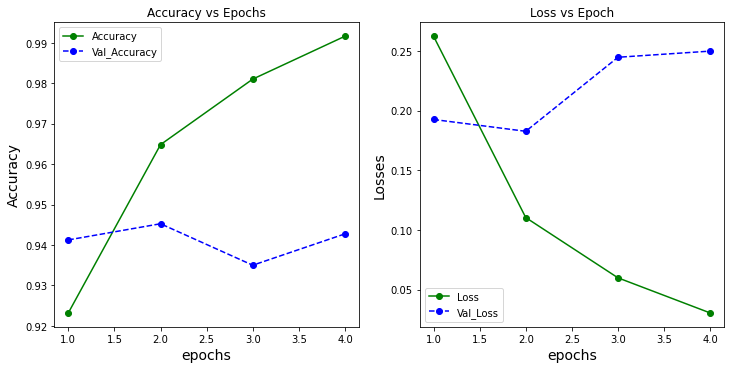

In [40]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

fig, ax = plt.subplots(1,2, figsize=(12,5.6))
ax[0].plot(epochs, acc, 'go-', label='Accuracy')
ax[0].plot(epochs, val_acc, 'bo--', label='Val_Accuracy')
ax[0].set_xlabel('epochs', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].set_title("Accuracy vs Epochs")
ax[0].legend()

ax[1].plot(epochs, loss, 'go-', label='Loss')
ax[1].plot(epochs, val_loss, 'bo--', label='Val_Loss')
ax[1].set_xlabel('epochs', fontsize=14)
ax[1].set_ylabel('Losses', fontsize=14)
ax[1].set_title("Loss vs Epoch")
ax[1].legend()

plt.show()

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
class_dict = train_generator.class_indices
class_dict.items()

dict_items([('butterfly', 0), ('cat', 1), ('chicken', 2), ('cow', 3), ('dog', 4), ('elephant', 5), ('horse', 6), ('sheep', 7), ('spider', 8), ('squirrel', 9)])

In [35]:
def get_key(dict1, val):
  for key,value in dict1.items():
    if val==value:
      return key
  return "key does not exist!"

get_key(class_dict, 1)

'cat'

In [51]:
def get_class(dict1, dir):
  for key,value in dict1.items():
    if dir==key:
      return value
  return "key does not exist!"

get_class(class_dict, 'chicken')

2

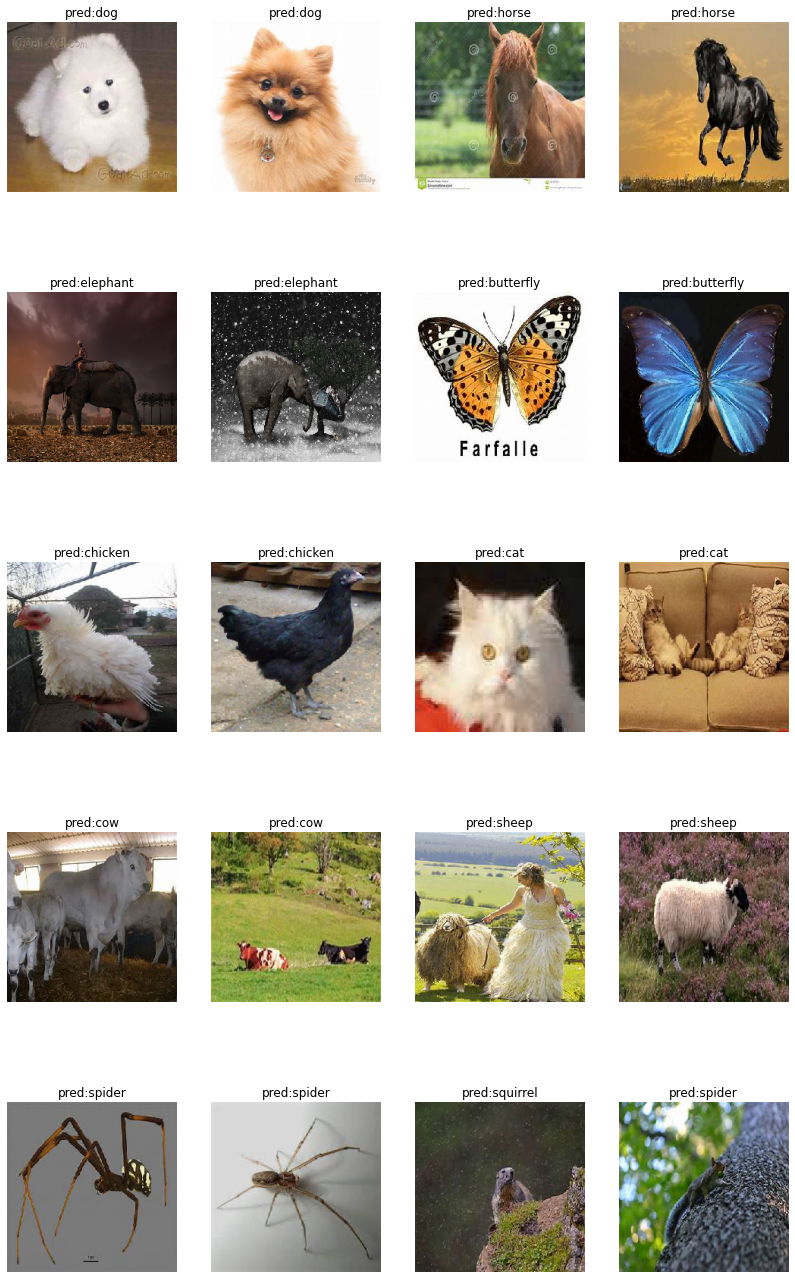

In [45]:
# Predicting some random images
import random
j=1
plt.figure(figsize=(14,24))
for dir in os.listdir('animal10/test/'):
  for i in range(2):
    random_img = random.sample(os.listdir('animal10/test/'+dir),1)
    img = load_img('animal10/test/'+dir+'/'+random_img[0], target_size=(224,224))
    i = img_to_array(img)/255.
    img_array = np.array([i])
    pred = model.predict(img_array)
    prediction = str(get_key(class_dict, np.argmax(pred)) )

    plt.subplot(5,4,j)
    plt.imshow(img_array[0])
    plt.title("pred:"+prediction)
    plt.xlabel("org= "+str(dir))
    plt.axis('off')
    j+=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[7.1416883e-07 3.2111572e-08 1.2291770e-07 1.6164686e-05 2.4656770e-06
  2.9440045e-08 9.9996746e-01 1.2198127e-05 2.9832063e-07 4.7757464e-07]]
This is a horse


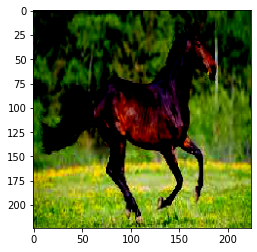

In [36]:
class_dict = train_generator.class_indices

path= "/content/drive/MyDrive/Colab Notebooks/Data/animal10/images.jpeg"
img = load_img(path, target_size=(224,224))

i= preprocess_input(img_to_array(img))
#model1 = load_model('animal10Predictor.hdf5')
input_arr = np.array([i])
input_arr.shape 

pred = model.predict(input_arr)

print(pred)
print("This is a "+ get_key(class_dict, np.argmax(pred)) )
plt.imshow(input_arr[0])
plt.show()

In [67]:
dirs = []
for dir in os.listdir('animal10/test'):
  print(dir, len(os.listdir('animal10/test/'+dir)) )
  dirs.append(dir)

dog 400
horse 400
elephant 400
butterfly 400
chicken 400
cat 400
cow 400
sheep 400
spider 400
squirrel 400


In [58]:
y_test = []
y_actual = []

In [65]:
# Getting predictions for test/Parasitized
from tensorflow.keras.preprocessing.image import load_img
for dir in os.listdir('animal10/test/'):
  for i in range(400):
    random_image = random.sample(os.listdir('animal10/test/'+dir),1)
    img = load_img('animal10/test/'+dir+'/'+random_image[0], target_size=(224,224))
    i = preprocess_input(img_to_array(img))
    #i = np.expand_dims(i, axis=0)
    i = np.array([i])
    p= model.predict(i)
    prediction = np.argmax(p)
    y_test.append(prediction)
    classs = get_class(class_dict, dir)
    y_actual.append(classs)

In [66]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_test)
cm

array([[400,   0,   0,   0,   0,   0,   0,   0,  10,   0],
       [  0, 355,   0,   4,  32,   6,   0,   1,   3,   9],
       [  5,   0, 373,   5,   9,   0,   0,  11,   2,   5],
       [  0,   0,   0, 364,   7,   3,   5,  29,   2,   0],
       [  0,   4,   0,   5, 387,   0,   7,   6,   0,   1],
       [  5,   0,   0,   0,   2, 391,   0,   9,   0,   3],
       [  0,   0,   0,  15,   4,   8, 374,   6,   3,   0],
       [  0,   0,   0,  19,   2,   0,   2, 387,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0,   0, 407,   0],
       [  0,   1,   0,   3,   2,   0,   0,   0,   4, 400]])

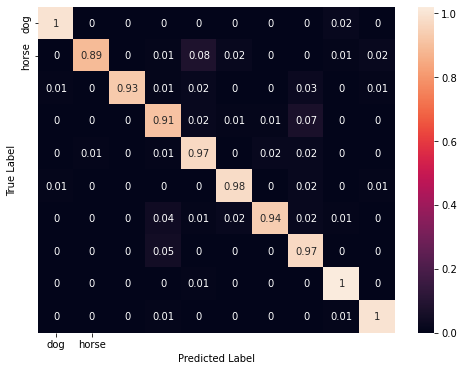

In [69]:
# Plot Confusion matrix
import seaborn as sns

plt.figure(figsize=(8,6))
cm_rounded= np.round(cm/400,2)
sns.heatmap(cm_rounded, annot=True)

plt.xticks([0.5,1.5],dirs)
plt.yticks([0.5,1.5],dirs)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [75]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_actual, y_test, target_names=dirs))

              precision    recall  f1-score   support

         dog       0.98      0.98      0.98       410
       horse       0.99      0.87      0.92       410
    elephant       1.00      0.91      0.95       410
   butterfly       0.88      0.89      0.88       410
     chicken       0.86      0.94      0.90       410
         cat       0.96      0.95      0.96       410
         cow       0.96      0.91      0.94       410
       sheep       0.86      0.94      0.90       410
      spider       0.94      0.99      0.97       410
    squirrel       0.96      0.98      0.97       410

    accuracy                           0.94      4100
   macro avg       0.94      0.94      0.94      4100
weighted avg       0.94      0.94      0.94      4100



Conclusion: All the testing and reports suggest that we get good accuracy in predicting the original class using MobilenetV2 model

In [ ]:

  
#import cv2
import numpy as np
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

#model = tf.keras.models.load_model("saved_model/animal10predictor.hdf5")
### load file
uploaded_file = st.file_uploader("Choose a image file", type="jpg")

# map_dict = {'butterfly': 0,
#             'cat': 1,
#             'chicken': 2,
#             'cow': 3,
#             'dog': 4,
#             'elephant': 5,
#             'horse': 6,
#             'sheep': 7,
#             'spider': 8,
#             'squirrel': 9}


if uploaded_file is not None:

    # # Convert the file to an opencv image.
    # file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    # opencv_image = cv2.imdecode(file_bytes, 1)
    # opencv_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
    # resized = cv2.resize(opencv_image,(224,224))
    # # Now do something with the image! For example, let's display it:
    # st.image(opencv_image, channels="RGB")

    # resized = mobilenet_v2_preprocess_input(resized)
    # img_reshape = resized[np.newaxis,...]

  img = image.load_img(uploaded_file, target_size=(224,224))
  i= image.img_to_array(img)
  i = preprocess_input(i)
  input_arr = np.array([i])
  input_arr.shape 



  Genrate_pred = st.button("Generate Prediction")    
  if Genrate_pred:
    pred = model.predict(input_arr)
    print("This is a "+ get_key(class_dict, np.argmax(pred)) )
    #prediction = model.predict(input_arr).argmax()
    st.title("Predicted Label for the image is {}".format(get_key(class_dict, np.argmax(pred))) )

ContextualVersionConflict: ignored

In [ ]:
!pip install streamlit